# HW3-2 - Travel Review Ratings 

作業檔案：
- hw3-2.ipynb

資料：
https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

- google_review_ratings.csv

參考網站：有
- https://www.kaggle.com/ishbhms/travel-rating-reviews-analysis

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Ubuntu|18.04 LTS|
|程式執行環境|jupyter notebook|1.0.0|
|python 版本|python3|3.6.9|
|安裝環境|pip|20.1|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|6|
|記憶體需求|$\leq 4$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

## 觀察資料型態與分佈

首先快速檢視資料的特徵，共有25個欄位：

- User
- Category 1 ~ 24

User欄位即為每筆資料的id，Category 1 ~ 24為該使用者對各個種類景點的評分，數值範圍1 ~ 5，0則代表未評分。

In [138]:
# Read data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = './google_review_ratings.csv'

df = pd.read_csv(data_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

發現存在奇怪的欄位(第25欄)，以及Category 11資料型態跟其他人不同，檢查後發現似乎是有資料填壞的情形，因為填壞的資料僅2筆，故決定直接刪除。另外為了方便辨認，將原本的Category 1 ~ 24重新命名成它原本的名字。

In [139]:
df = df[df.iloc[:, 25].isna() == True]
df = df.drop(df.columns[25], axis=1)
df['Category 11'] = pd.to_numeric(df['Category 11'])
column_names = ['user', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
df.columns = column_names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user                   5454 non-null   object 
 1   churches               5454 non-null   float64
 2   resorts                5454 non-null   float64
 3   beaches                5454 non-null   float64
 4   parks                  5454 non-null   float64
 5   theatres               5454 non-null   float64
 6   museums                5454 non-null   float64
 7   malls                  5454 non-null   float64
 8   zoo                    5454 non-null   float64
 9   restaurants            5454 non-null   float64
 10  pubs_bars              5454 non-null   float64
 11  local_services         5454 non-null   float64
 12  burger_pizza_shops     5454 non-null   float64
 13  hotels_other_lodgings  5454 non-null   float64
 14  juice_bars             5454 non-null   float64
 15  art_

看看有哪些欄位是使用者不太會給評分的，結果發現麵包店、健身房、美容spa是倒數前三名。

Text(0.5, 1.0, 'Number of reviews under each category')

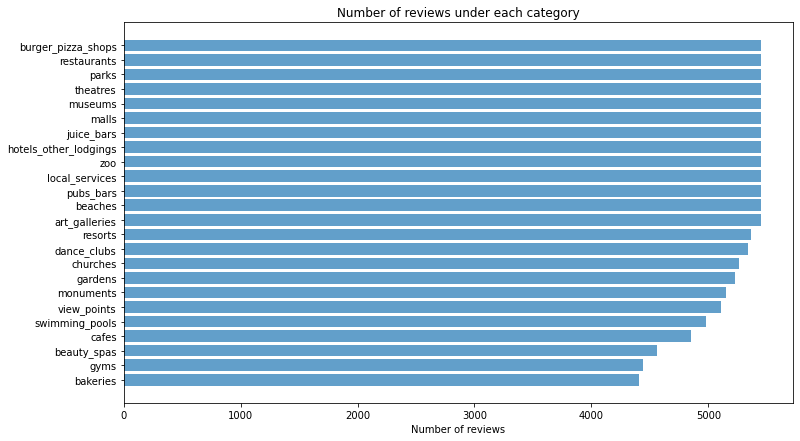

In [140]:
num_zeros = df[column_names[1:]].astype(bool).sum(axis=0).sort_values()

plt.figure(figsize=(12,7))
plt.barh(np.arange(len(column_names[1:])), num_zeros.values, align='center', alpha=0.7)
plt.yticks(np.arange(len(column_names[1:])), num_zeros.index)
plt.xlabel('Number of reviews')
plt.title('Number of reviews under each category')

再來看看各欄位的平均評分，結果發現商場、餐廳、戲院為最高前三名；健身房、游泳池、咖啡館為倒數前三名。

Text(0.5, 1.0, 'Average rating per Category')

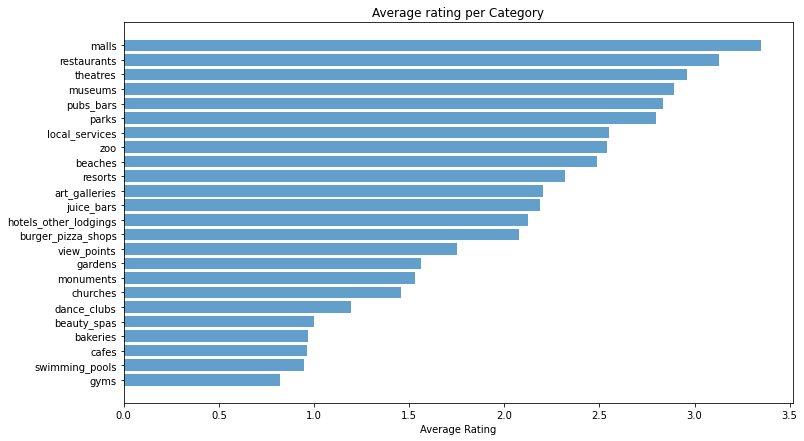

In [141]:
avg_rating = df[column_names[1:]].mean()
avg_rating = avg_rating.sort_values()
plt.figure(figsize=(12,7))
plt.barh(np.arange(len(column_names[1:])), avg_rating.values, align='center', alpha=0.7)
plt.yticks(np.arange(len(column_names[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

檢視各欄位間的相關性，各欄資料間的相關性不算高，但仍可以發現，鄰近類別的相關性（如類別9與10）的相關性高，以及類別1與24的相關性也偏高。

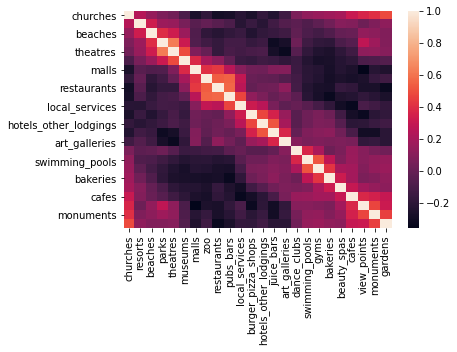

In [142]:
sns.heatmap(df[1:].corr())

## 問題設定



In [165]:
ratings_per_category_df = pd.DataFrame(df[column_names[1:]].mean()).reset_index(level=0)
ratings_per_category_df.columns = ['category', 'avg_rating']
ratings_per_category_df['no_of_ratings'] = df[column_names[1:]].astype(bool).sum(axis=0).values.tolist()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ratings_per_category_df['avg_rating_scaled'] = scaler.fit_transform(ratings_per_category_df['avg_rating'].values.reshape(-1,1))
ratings_per_category_df['no_of_ratings_scaled'] = scaler.fit_transform(ratings_per_category_df['no_of_ratings'].values.reshape(-1,1))
def calculate_weighted_rating(x):
    return (x['avg_rating_scaled'] * x['no_of_ratings_scaled'])

ratings_per_category_df['weighted_rating'] = ratings_per_category_df.apply(calculate_weighted_rating, axis = 1)
ratings_per_category_df = ratings_per_category_df.sort_values(by=['weighted_rating'], ascending = False)

def get_recommendation_based_on_popularity(x):
    zero_cols = df[df['user'] == x['user']][column_names[1:]].astype(bool).sum(axis=0)
    zero_df = pd.DataFrame(zero_cols[zero_cols == 0]).reset_index(level = 0)
    zero_df.columns = ['category', 'rating']
    zero_df = pd.merge(zero_df, ratings_per_category_df, on = 'category', how = 'left')[['category', 'weighted_rating']]
    zero_df = zero_df.sort_values(by = ['weighted_rating'], ascending = False)
    if len(zero_df) > 0:
        return zero_df['category'].values[0]
    else:
        return ""
df_recommendation = df.copy()
df_recommendation['recommendation_based_on_popularity'] = df_recommendation.apply(get_recommendation_based_on_popularity, axis = 1)


In [176]:
df_recommendation['recommendation_based_on_popularity'][df['user'] == 'User 97']


96    
Name: recommendation_based_on_popularity, dtype: object

In [78]:
# Add the column `Tomorrow Movement` by comparing the `Close Price` with the previous days as the training target

train_df['Tomorrow Movement'] = np.where(train_df['Close Price'].diff() >= 0, 1, 0)
test_df['Tomorrow Movement'] = np.where(test_df['Close Price'].diff() >= 0, 1, 0)

train_df['Tomorrow Movement'] = train_df['Tomorrow Movement'].shift(-1)
test_df['Tomorrow Movement'] = test_df['Tomorrow Movement'].shift(-1)

train_df.drop(train_df.tail(1).index,inplace=True)
test_df.drop(test_df.tail(1).index,inplace=True)

print(train_df.head())
print(train_df.tail())

NameError: name 'train_df' is not defined

將標籤與特徵資料分離。

In [ ]:
# Divide x and y data

train_x_df = train_df.drop(columns=['Tomorrow Movement'])
train_y_df = train_df['Tomorrow Movement']

test_x_df = test_df.drop(columns=['Tomorrow Movement'])
test_y_df = test_df['Tomorrow Movement']

print(train_x_df.shape)
print(train_x_df.head())
print(train_y_df.shape)
print(train_y_df.head())
print('-----')
print(test_x_df.shape)
print(test_x_df.head())
print(test_y_df.shape)
print(test_y_df.head())

捨棄有NaN的欄位。

In [ ]:
# Drop rows with NaN values

train_df = train_df.dropna()
test_df = test_df.dropna()

print(train_df.shape)

### 時間序列的處理

股票為時間序列資料，可以分解成幾種元素：
- T(t)： Trend component，代表整題資料的走勢
- S(t)： Seasonal component，代表資料在固定時間週期內的循環訊號，通常以日、週、月、季
- C(t)： Cyclic component，代表長時間的循環訊號，但無固定週期或者週期很長，這裡會把此元素併入S(t)
- I(t)： Irregular component，無法以上面的元素表示的訊號，即雜訊

整體資料y(t)可以用上述元素的兩種形式來組成
1. 加法形式 $ y(t) = T(t) + S(t) + I(t) $
1. 乘法形式 $ y(t) = T(t) * S(t) * I(t) $

經實驗後發現，這裡要處理的資料用乘法形式來表現成果較佳，所有欄位的時間序列分解如下面所示。可以發現訓練資料的trend元素是往上走的，且數值範圍與其他元素相差過大，經實驗發現如果不把此因素去除，機器學習時受trend影響過大，會直接把預測結果猜為全部上漲（即預測結果全為1），因此這裡依照乘法形式把trend元素從資料中移除，資料剩下$ y(t) = S(t) * I(t) $，只由Seasonal與Irregular來主宰。

另外在實驗時發現，季節性元素的週期不宜設定過大，這裡將`period`設為3，表示某天的資料僅會受過去3天的資料影響，換句話說，上星期、上個月、甚至去年的資料跟當天的資料幾乎沒有關聯。

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
for key in train_x_df.keys():
    timeseries = seasonal_decompose(train_x_df[key], model='multiplicative', period=3)
    timeseries.trend.fillna(method='bfill', inplace=True)
    timeseries.trend.fillna(method='ffill', inplace=True)
    train_x_df[key] = train_x_df[key] / timeseries.trend
    timeseries.plot()
    plt.show()
    

測試資料也同訓練資料做一樣的處理，處理完後的資料概覽如下。

In [ ]:
for key in test_x_df.keys():
    timeseries = seasonal_decompose(test_x_df[key], model='multiplicative', period=3)
    timeseries.trend.fillna(method='bfill', inplace=True)
    timeseries.trend.fillna(method='ffill', inplace=True)
    test_x_df[key] = test_x_df[key] / timeseries.trend
    #timeseries.plot()
    #plt.show()
    

In [ ]:
print('-------- Training Data --------')
print(train_x_df.describe())
print('\n-------- Testing Data --------')
print(test_x_df.describe())

### 資料正規化

將資料約範圍轉換到[0,1]，並且平均值為0。

In [ ]:
# Normalize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x_df)

normalized_train_x_df = scaler.transform(train_x_df)
normalized_train_x_df = np.transpose(normalized_train_x_df)

normalized_train_x_df = pd.DataFrame({
    'Open Price': normalized_train_x_df[0],
    'Close Price': normalized_train_x_df[1],
    'High Price': normalized_train_x_df[2],
    'Low Price': normalized_train_x_df[3],
    'Volume': normalized_train_x_df[4],
})

normalized_test_x_df = scaler.transform(test_x_df)
normalized_test_x_df = np.transpose(normalized_test_x_df)
normalized_test_x_df = pd.DataFrame({
    'Open Price': normalized_test_x_df[0],
    'Close Price': normalized_test_x_df[1],
    'High Price': normalized_test_x_df[2],
    'Low Price': normalized_test_x_df[3],
    'Volume': normalized_test_x_df[4],
})

print('-------- Training Data Quick View --------')
print(normalized_train_x_df.head())
print('\n-------- Training Labels --------')
print(train_y_df.head())

## Logistic Regression

利用Logistic Regression來做二元分類器，訓練與測試結果精度達0.79左右，算是不錯。

In [ ]:
# Train & Predict using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model =  LogisticRegression(random_state=0, solver='liblinear')
lr_model.fit(normalized_train_x_df, train_y_df)

lr_training_acc = lr_model.score(normalized_train_x_df, train_y_df)
print('training accuracy: {}'.format(lr_training_acc))

lr_predict_test_result = lr_model.predict(normalized_test_x_df)
lr_testing_acc = lr_model.score(normalized_test_x_df, test_y_df)
print('testing accuracy: {}'.format(lr_testing_acc))

print('\npredicted testing labels:')
print(lr_predict_test_result)

### 分類結果評估

In [ ]:
# Print precision, recall, fbeta-score and confusion matrix

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

print('precision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df, lr_predict_test_result, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df, lr_predict_test_result).ravel()
print((tn, fp, fn, tp))

## SVM

利用SVM來做二元分類器，訓練與測試結果精度達0.79左右，算是不錯。

In [ ]:
# Train & Predict with SVC

from sklearn.svm import SVC

svc_model = SVC(C=1, kernel='linear', probability=True)
svc_model.fit(normalized_train_x_df, train_y_df)

svc_training_acc = svc_model.score(normalized_train_x_df, train_y_df)
print('training accuracy: {}'.format(svc_training_acc))

svc_predict_test_result = svc_model.predict(normalized_test_x_df)
svc_testing_acc = svc_model.score(normalized_test_x_df, test_y_df)
print('testing accuracy: {}'.format(svc_testing_acc))

print('\npredicted testing labels:')
print(svc_predict_test_result)

### 分類結果評估

In [ ]:
# Print precision, recall, fbeta-score and confusion matrix

print('precision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df, svc_predict_test_result, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df, svc_predict_test_result).ravel()
print((tn, fp, fn, tp))

## Neural Network

製作類神經網路模型前，需要先將Label轉換為One-hot encoding的形式。

In [ ]:
# Define NN output groundtruth

falling_prob = pd.DataFrame(data=np.where(train_y_df == 0, 1, 0)[:])
train_y_df = pd.DataFrame(data=np.where(train_y_df == 0, 0, 1)[:])
train_y_df = pd.concat( [ falling_prob, train_y_df ], axis=1, ignore_index=True )

falling_prob = pd.DataFrame(data=np.where(test_y_df == 0, 1, 0)[:])
test_y_df = pd.DataFrame(data=np.where(test_y_df == 0, 0, 1)[:])
test_y_df = pd.concat( [ falling_prob, test_y_df ], axis=1, ignore_index=True )

print('-------- Training Labels --------')
print(train_y_df.shape)
print(train_y_df.head())

NN結構如下：

類型|大小|激發函數
---|---|---
Linear|(5, 100)|ReLU
Linear|(100, 2)|Softmax

超參數資訊如下：
- Batch size： 100
- Optimizer： AdaGrad
- Loss function： BCEWithLogitsLoss (Cross Entropy的變形)

經實驗，batch size若太大精度會不高，太小則會拉長訓練時間但精度不會提升太多；Optimizer選用AdaGrad則是藉可變動的learning rate來提升初期訓練速度，但在後期又可以收斂；Loss function因為是二元分類問題，因此選用固定班底的Cross Entropy。

In [ ]:
# Define NN structure

import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

class M_NN(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(M_NN, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        self.softmax = torch.nn.Softmax(1)

    def forward(self, x):
        h = self.linear1(x)
        acti_out = F.relu(h)
        acti_out = self.linear2(h)
        y_pred = self.softmax(acti_out)
        return y_pred


# N = batch size, D_in = input size, H = hidden size, D_out = output size
N, D_in, H, D_out = 100, 5, 100, 2  # !--- You can modify here ---!

# create tensor
train = torch.tensor(normalized_train_x_df.values.astype(np.float32))
train_target = torch.tensor(train_y_df.values.astype(np.float32)) 
train_tensor = TensorDataset(train, train_target) 
train_loader = DataLoader(train_tensor, batch_size = N, shuffle = True)

model = M_NN(D_in, H, D_out)
criterion = torch.nn.BCEWithLogitsLoss() # !--- You can modify here ---!
optimizer = torch.optim.Adagrad(model.parameters(), initial_accumulator_value=0.1)
 # !--- You can modify here ---!


# Train NN
# !--- You can modify here ---!

for t in range(1001):
    for batch_x, batch_y in train_loader: 
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (t%100 == 0):
        print('epoch: %d - loss: %.10f' % (t, loss.item()))

訓練與測試結果精度達0.79左右，算是不錯。

In [ ]:
# Predict

nn_predict_train_y = model(train)
result_train = np.where(nn_predict_train_y[:, 0] > nn_predict_train_y[:, 1], 1, 0) # !-- You can modify here --!
print('training accuracy:')
print(accuracy_score(train_y_df[0], result_train))

nn_predict_test_y = model(torch.tensor(normalized_test_x_df.values.astype(np.float32)))
result_test = np.where(nn_predict_test_y[:, 0] > nn_predict_test_y[:, 1], 1, 0) # !-- You can modify here --!
print('\ntesting accuracy:')
print(accuracy_score(test_y_df[0], result_test))

print('\npredicted testing prob:')
print(nn_predict_test_y[:5,:])
print('\npredicted testing labels:')
print(result_test)

### 分類結果評估

In [ ]:
# Print precision, recall, fbeta-score and confusion matrix

print('\nprecision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df[0], result_test, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df[0], result_test).ravel()
print((tn, fp, fn, tp))

# Discussion

總結上述3種分類方法評估結果如下：

|分類方法|Precision|Recall|F-beta Score|
|:---:|---:|---:|---:|
|Logistic|0.7928|0.7928|0.7926|
|SVM|0.7930|0.7928|0.7925|
|NN|0.7896|0.7888|0.7882|

可以看出Logistic與SVM的表現幾乎相同，NN稍微差一點點，推測可能是層數太少，若再加深或許能增加精度。

#### 此次模型是否適用於其他資料集

由於這次訓練資料的trend元素走勢是持續上升，若是遇到有升有降的trend時不確定能不能用同樣方法處理，另外時間序列在此是選擇乘法形式，若是遇到加法形式的資料時便需要重新處理，模型本身方面，若是時間序列問題解決，Logistic與SVM理應可以通用，NN則容易因訓練資料不足而無法適用於其他資料。

#### 如何改善分類模型

Logistic沒有更動太多參數便達到此精度；SVM經實驗後發現不同的kernal function對結果沒有影響太大，因此回歸最簡單的linear；NN對結果影響最大的部份在於loss function，分類問題若使用MSE作為loss function會不容易收斂（loss 容易卡在0.6 ~ 0.7），使用Cross entropy才是較恰當的。